In [61]:
import numpy as np

x = np.array([
  [-2.0, 1.0, 2.0, 3.0],
  [-20.0, 10.0, 20.0, 30.0],
  [-2000.0, 1000.0, 2000.0, 3000.0]])

In [62]:
# Implement relu function

def relu(x):
    return np.maximum(0,x)

y = relu(x)
y

array([[0.e+00, 1.e+00, 2.e+00, 3.e+00],
       [0.e+00, 1.e+01, 2.e+01, 3.e+01],
       [0.e+00, 1.e+03, 2.e+03, 3.e+03]])

In [63]:
# Implement relu6 function

def relu6(x):
    return np.minimum(6, relu(x))

y = relu6(x)
y

array([[0., 1., 2., 3.],
       [0., 6., 6., 6.],
       [0., 6., 6., 6.]])

In [64]:
# Implement sigmoid function

def sigmoid(x):
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]
    return top / (1 + z)

y = sigmoid(x)
y

array([[1.19202922e-01, 7.31058579e-01, 8.80797078e-01, 9.52574127e-01],
       [2.06115362e-09, 9.99954602e-01, 9.99999998e-01, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [65]:
# Implement tanh function

def tanh(x):
    np.seterr(over='ignore')
    exp_positive = np.exp(x)
    exp_negative = np.exp(-x)
    A = (exp_positive - exp_negative)
    B = (exp_positive + exp_negative)
    return np.divide(A, B, where=(A != np.inf)&(B != np.inf))

y = tanh(x)
y

array([[-0.96402758,  0.76159416,  0.96402758,  0.99505475],
       [-1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [66]:
# Implement softmax function

def softmax(x):
    axis = next(j[0] for j in enumerate(x.shape) if j[1] > 1)
    x = x - np.expand_dims(np.max(x, axis = axis), axis)
    e = np.exp(x)
    return e / e.sum(axis=0)

y = softmax(x)
y

array([[9.99999985e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.52299795e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

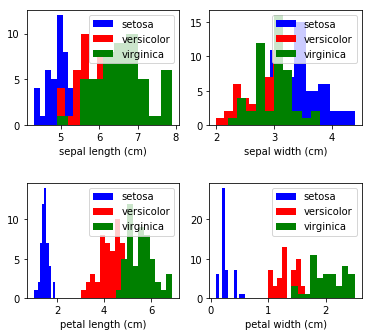

In [67]:
# load iris dataset as panda dataframe and display it in a jupyter notebook
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline 

# plot the histogram of each one of the input variables 

def load_iris():
    iris = datasets.load_iris()
    
    fig, axes = plt.subplots(nrows= 2, ncols=2)
    plt.subplots_adjust(hspace=0.5, bottom=1, top=2)

    colors= ['blue', 'red', 'green']
    
    for i, ax in enumerate(axes.flat):
        for label, color in zip(range(len(iris.target_names)), colors):
            ax.hist(iris.data[iris.target==label, i],
                    label=iris.target_names[label], color=color)
            ax.set_xlabel(iris.feature_names[i])  
            ax.legend(loc='upper right')

    plt.show()

load_iris()

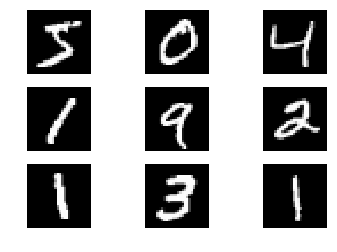

In [69]:
from keras.datasets import mnist

# load mnist dataset and display in the jupyter notebook in a grid 3x3 samples of the 10 digits

def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    images_9 = x_train[:10] # Take the first 9 images
    
    fig, axes = plt.subplots(nrows= 3, ncols=3)

    for i, ax in enumerate(axes.flat):
        pixels = np.array(images_9[i], dtype='float').reshape((28, 28))
        ax.imshow(pixels, cmap='gray')
        ax.axis('off')

    plt.show()

load_mnist()